In [25]:
import numpy as np
import random
import time
import gym
from collections import defaultdict
import itertools
import matplotlib
import matplotlib.style
import pandas as pd
import sys
matplotlib.style.use('ggplot')
import plotting
import numpy as np

In [26]:
class environment:
    def __init__(self):
        self.env_rows = 4
        self.env_columns = 4
        self.actions = ['up', 'right', 'down', 'left']
        self.q_values = np.zeros((self.env_rows, self.env_columns, len(self.actions)))
        self.rewards = np.full((self.env_rows, self.env_columns), -1)
        self.rewards[0,2] = 100
        self.fire = {}
        self.fire = {}
        self.fire[0] = []
        self.fire[1] = [1,3]
        self.fire[2] = []
        self.fire[3] = [0,2]
        for row_index in range(self.env_rows):
            for column_index in self.fire[row_index]:
                self.rewards[row_index, column_index] = -100

In [27]:
env = environment()

In [28]:
print(env.rewards)

[[  -1   -1  100   -1]
 [  -1 -100   -1 -100]
 [  -1   -1   -1   -1]
 [-100   -1 -100   -1]]


env_rows = 7
env_columns = 7
actions = ['up', 'right', 'down', 'left']
q_values = np.zeros((env_rows, env_columns, len(actions)))
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left

rewards = np.full((env_rows, env_columns), -1)
rewards[2,3] = 100 
rewards

fire = {}
fire[0] = [3,6]
fire[1] = [2,6]
fire[2] = [1,5]
fire[3] = []
fire[4] = [2,4]
fire[5] = [0,3]
fire[6] = [4,6]

fire

for row_index in range(7):
    for column_index in fire[row_index]:
        env.rewards[row_index, column_index] = -100
env.rewards

In [17]:
def is_terminal_state(current_row_index, current_column_index):
    if env.rewards[current_row_index, current_column_index] == -1:
        return False
    else:
        return True

In [29]:
def get_starting_location():
    current_row_index = np.random.randint(0, env.env_rows - 1)
    current_column_index = np.random.randint(0, env.env_columns - 1)
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(0, env.env_rows-1)
        current_column_index = np.random.randint(0, env.env_columns-1)
    return current_row_index, current_column_index

def get_next_action(current_row_index, current_column_index, epsilon):
#if a randomly chosen value between 0 and 1 is less than epsilon, 
#then choose the most promising value from the Q-table for this state.
    if np.random.random() < epsilon:
        return np.argmax(env.q_values[current_row_index, current_column_index])
    else:   #choose random action
        return np.random.randint(4)

def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if env.actions[action_index] == 'up' and current_row_index  > 0:
        new_row_index -= 1
    elif env.actions[action_index] == 'right' and current_column_index < env.env_columns - 1:
        new_column_index += 1
    elif env.actions[action_index] == 'down' and current_row_index < env.env_rows - 1:
        new_row_index += 1
    elif env.actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

In [31]:
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: #if this is a 'legal' starting location
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
        while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
            action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
        return shortest_path

In [32]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the agent should learn
num_episodes = 1000
episode_lengths = np.zeros(num_episodes)
episode_rewards = np.zeros(num_episodes)
#run through 1000 training episodes
for episode in range(num_episodes):
  #get the starting location for this episode
    row_index, column_index = get_starting_location()
  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the fire or the goal state
    while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
    #perform the chosen action, and transition to the next state (i.e., move to the next location)
        old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
    #receive the reward for moving to the new state, and calculate the temporal difference
        reward = env.rewards[row_index, column_index]
        
        episode_rewards[episode] += reward
        next_action_index = get_next_action(row_index, column_index, epsilon)
        old_q_value = env.q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * (env.q_values[row_index, column_index, next_action_index])) - old_q_value
    #update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        env.q_values[old_row_index, old_column_index, action_index] = new_q_value
    
print('Training complete!')

Training complete!


In [34]:
get_shortest_path(1, 0)

[[1, 0], [0, 0], [0, 1], [0, 2]]

In [36]:
import matplotlib.pyplot as plt

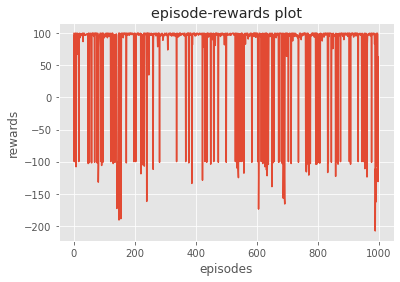

In [39]:
#plt.scatter([i for i in range(num_episodes)], episode_rewards)
plt.plot([i for i in range(1000)], episode_rewards[:1000])
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.title('episode-rewards plot')
plt.show()